## Questão 2

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from mylibs import resample
from sklearn import linear_model
from sklearn import svm
from sklearn import ensemble
from sklearn import metrics
import matplotlib.pyplot as plt

Carregando dados

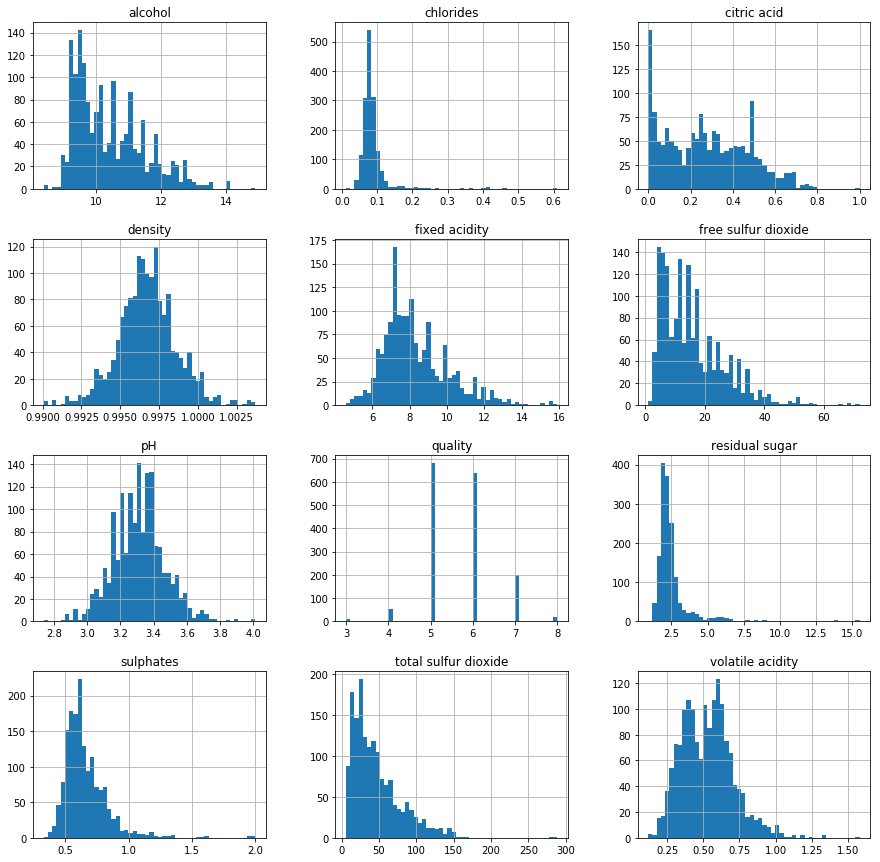

In [2]:
data = pd.read_csv("winequality-red.csv", sep=';')
data.shape[0]
data.drop(0).head()
data.hist(figsize=(15,15), bins=50);

Separando folds

In [3]:
X_tr, X_te = resample.split_k_fold(1599, 5, False, None)
X_train_final = data.iloc[:, 0:11]
y_train_final = data.iloc[:, 11]
X_train = []
y_train = []
X_test = []
y_test = []
for i in range(5):
    X_train.append(data.iloc[X_tr[i],0:11])
    y_train.append(data.iloc[X_tr[i],11])
    X_test.append(data.iloc[X_te[i],0:11])
    y_test.append(data.iloc[X_te[i],11])


Criando modelos

In [4]:
SGD = []
LR = []
SVR = []
SVC = []
RFR = []
GBR = []

for i in range(5):
    SGD.append(linear_model.SGDRegressor())
    LR.append(linear_model.LinearRegression())
    SVR.append(svm.SVR())
    SVC.append(svm.SVC())
    RFR.append(ensemble.RandomForestRegressor())
    GBR.append(ensemble.GradientBoostingRegressor())

Treinando modelos

In [5]:
for i in range(5):
    SGD[i].fit(X_train[i], y_train[i])
    LR[i].fit(X_train[i], y_train[i])
    SVR[i].fit(X_train[i], y_train[i])
    SVC[i].fit(X_train[i], y_train[i])
    RFR[i].fit(X_train[i], y_train[i])
    GBR[i].fit(X_train[i], y_train[i])

/home/johnny/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/johnny/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/johnny/anaco

Fazendo Predição

In [6]:

y_predSGD = [] 
y_predLR = []
y_predSVR = []
y_predSVC = []
y_predRFR = []
y_predGBR = []
for i in range(5):
    y_predSGD.append(SGD[i].predict(X_test[i]))
    y_predLR.append(LR[i].predict(X_test[i]))
    y_predSVR.append(SVR[i].predict(X_test[i]))
    y_predSVC.append(SVC[i].predict(X_test[i]))
    y_predRFR.append(RFR[i].predict(X_test[i]))
    y_predGBR.append(GBR[i].predict(X_test[i]))


Calculando MSE

In [7]:
result = []
cont = 0

for i in range(5):
    result.append(metrics.mean_squared_error(y_test[i], y_predSGD[i]))
    
    result.append(metrics.mean_squared_error(y_test[i], y_predLR[i]))
    result.append(metrics.mean_squared_error(y_test[i], y_predSVR[i]))
    result.append(metrics.mean_squared_error(y_test[i], y_predSVC[i]))
    result.append(metrics.mean_squared_error(y_test[i], y_predRFR[i]))
    result.append(metrics.mean_squared_error(y_test[i], y_predGBR[i]))
    print( " MSE-SGD{} :".format(i), result[cont])
    print( " MSE-LR{}  :".format(i), result[cont+1])
    print( " MSE-SVR{} :".format(i), result[cont+2])
    print( " MSE-SVC{} :".format(i), result[cont+3])
    print( " MSE-RFR{} :".format(i), result[cont+4])
    print( " MSE-GBR{} :".format(i), result[cont+5])
    print("")
    cont+=6
print("------------------------")

mediaSGD = 0.0
mediaLR  = 0.0
mediaSVR = 0.0
mediaSVC = 0.0
mediaRFR = 0.0
mediaGBR = 0.0
for cont in [0,6,12,18,24]:
    mediaSGD += result[cont]
    mediaLR  += result[cont+1]
    mediaSVR += result[cont+2]
    mediaSVC += result[cont+3]
    mediaRFR += result[cont+4]
    mediaGBR += result[cont+5]
    
mediaSGD = mediaSGD/5
mediaLR  = mediaLR/5
mediaSVR = mediaSVR/5
mediaSVC = mediaSVC/5
mediaRFR = mediaRFR/5
mediaGBR = mediaGBR/5


print("Media SGD :", mediaSGD) 
print("Media LR  :" , mediaLR)
print("Media SVR :" , mediaSVR)
print("Media SVC :" , mediaSVC)
print("Media BGR :" , mediaGBR)

 MSE-SGD0 : 2.5802752886950586e+23
 MSE-LR0  : 0.4454717507054303
 MSE-SVR0 : 0.4910887387814121
 MSE-SVC0 : 0.5768025078369906
 MSE-RFR0 : 0.40708463949843254
 MSE-GBR0 : 0.3990239156031586

 MSE-SGD1 : 3.5410456932439038e+25
 MSE-LR1  : 0.45294210352761116
 MSE-SVR1 : 0.6174848667190949
 MSE-SVC1 : 0.8401253918495298
 MSE-RFR1 : 0.4883072100313479
 MSE-GBR1 : 0.4214828987190701

 MSE-SGD2 : 6.011008909812143e+24
 MSE-LR2  : 0.44506025077182215
 MSE-SVR2 : 0.5901102721390707
 MSE-SVC2 : 0.664576802507837
 MSE-RFR2 : 0.4627899686520376
 MSE-GBR2 : 0.42361388296731717

 MSE-SGD3 : 2.91056840234865e+23
 MSE-LR3  : 0.4086765699718121
 MSE-SVR3 : 0.5942137949972319
 MSE-SVC3 : 0.7962382445141066
 MSE-RFR3 : 0.44605015673981196
 MSE-GBR3 : 0.43138746430693203

 MSE-SGD4 : 1.3415785483121404e+23
 MSE-LR4  : 0.4319386442193976
 MSE-SVR4 : 0.6124334249460887
 MSE-SVC4 : 0.7523510971786834
 MSE-RFR4 : 0.48554858934169276
 MSE-GBR4 : 0.4315137451788599

------------------------
Media SGD : 8.420

## Questão 3

GBR ficou gigante


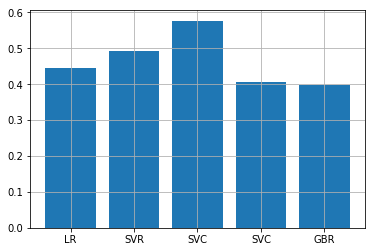

7 12


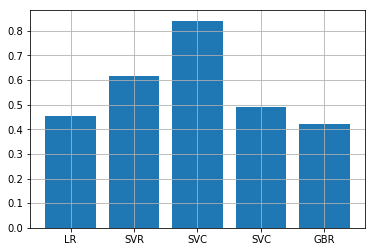

13 18


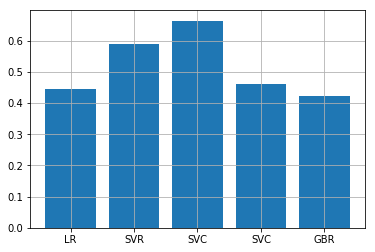

19 24


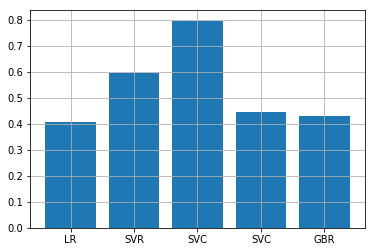

25 30


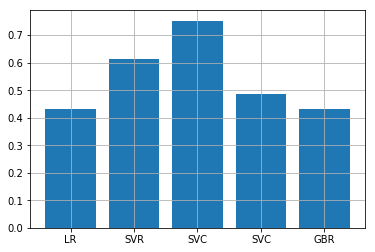

31 36


In [8]:
name =[ 'LR', 'SVR', 'SVC', 'SVC', 'GBR']
print("GBR ficou gigante")
mini = 1
maxi = 6
label = [i for i in range(len(name))]
for i in range(5):
    plt.grid()
    plt.bar(label,result[mini:maxi],);
    plt.xticks(range(len(name)),name)
    plt.show()
    mini = maxi +1
    maxi += 6
    print(mini, maxi)

## Questão 4

In [9]:
ModeloFinal = ensemble.GradientBoostingRegressor()
ModeloFinal.fit(X_train_final,y_train_final);
y_pred = ModeloFinal.predict(X_train_final)
print (metrics.mean_squared_error(y_train_final, y_pred))

0.25438114655319366


## Questão 5

O Stochastic Gradient Descent modifica os coeficientes a cada amostra diferente do Gradient Descent que só modifica os coeficientes depois de verificar todas as amostrar, repetindo esse processo várias vezes. Por este motivo, o Gradient Descent é mais demorado. 